In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the file

df = pd.read_csv(r"C:\Users\Lavanya\Downloads\Fake-news-project\Fake news project\train_news.csv")
df.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [3]:
# size of the data

df.shape

(20800, 6)

The dataset has 20800 entries and 6 columns with label being the target with binary categories.

The Unnamed:0 represents the serial number of the entries, it is same as the index of dataframe.

The id column corresponds unique number for each entry. It can be made as index.

headline and news column provide the title and content of the news respectively. They can be concatenated to a single column.

written_by gives us the name of the author.

In [4]:
# Authors with most fake news

fake = df[df['label']==1]
fake['written_by'].value_counts().head(10)

admin                                    193
Pakalert                                  86
Eddy Lavine                               85
Starkman                                  84
Gillian                                   82
Alex Ansary                               82
Editor                                    81
noreply@blogger.com (Alexander Light)     80
Dave Hodges                               77
Anonymous                                 77
Name: written_by, dtype: int64

In [5]:
# Authors with most real news

real = df[df['label']==0]
real['written_by'].value_counts().head(10)

Pam Key                242
Jerome Hudson          166
Charlie Spiering       141
John Hayward           140
Katherine Rodriguez    124
Warner Todd Huston     122
Ian Hanchett           119
Breitbart News         118
Daniel Nussbaum        112
AWR Hawkins            107
Name: written_by, dtype: int64

In [6]:
# Checking for null values

df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [7]:
# missing values in fake news

fake.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1931
news            39
label            0
dtype: int64

In [8]:
# missing values in real news

real.isnull().sum()

Unnamed: 0     0
id             0
headline       0
written_by    26
news           0
label          0
dtype: int64

We see a trend here, almost all the the null values in headline, news and written_by columns correponds to fake news. To maintain the integrity of this information even after concatination, we replace missing values with 'noinfo'. 

In [9]:
# replacing missing values with 'noinfo'

df.fillna("noinfo",inplace=True)
df.isnull().any()

Unnamed: 0    False
id            False
headline      False
written_by    False
news          False
label         False
dtype: bool

In [10]:
# dropping Unnamed:0 column
df.drop("Unnamed: 0",axis=1,inplace=True)

# concatenating title, news and author column and dropping the base columns
df["text"]=df["written_by"].astype(str)+df["headline"].astype(str)+df["news"].astype(str)
df.drop("written_by",axis=1,inplace=True)
df.drop("headline",axis=1,inplace=True)
df.drop("news",axis=1,inplace=True)

# setting id column as index
df.set_index("id",inplace=True)

df.head()

label                                               text
id                                                             
9653       0  Eric Lipton and Steve EderEthics Questions Dog...
10041      0  David WaldsteinU.S. Must Dig Deep to Stop Arge...
19113      0  Pam KeyCotton to House: ’Do Not Walk the Plank...
6868       0  Jess BidgoodPaul LePage, Besieged Maine Govern...
7596       1  Finian CunninghamA Digital 9/11 If Trump Wins ...

1    10413
0    10387
Name: label, dtype: int64




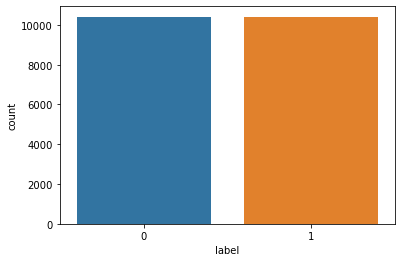

In [11]:
# target--> label

print(df['label'].value_counts())
print("\n")
plt.figure(figsize=(6,4))
sns.countplot(df['label'])
plt.show()

The countplot and the genarated value_counts indicate that the target is balanced.

In [12]:
# Importing necessary libraries for text processing

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import  stopwords
import string
import re

In [13]:
# all text to lower case
df['text']=df['text'].str.lower()

# removing punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')

# removing numbers
df['text'] = df['text'].str.replace(r'[^a-zA-z.,!?/:;\"\'\s]','')

# removing stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# tokenization
df['tok_text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

df.head()

label                                               text  \
id                                                                
9653       0  eric lipton steve ederethics questions dogged ...   
10041      0  david waldsteinus must dig deep stop argentina...   
19113      0  pam keycotton house walk plank vote bill canno...   
6868       0  jess bidgoodpaul lepage besieged maine governo...   
7596       1  finian cunninghama digital trump wins finian c...   

                                                tok_text  
id                                                        
9653   [eric, lipton, steve, ederethics, questions, d...  
10041  [david, waldsteinus, must, dig, deep, stop, ar...  
19113  [pam, keycotton, house, walk, plank, vote, bil...  
6868   [jess, bidgoodpaul, lepage, besieged, maine, g...  
7596   [finian, cunninghama, digital, trump, wins, fi...

In [14]:
# creating a new column containing the number of words in each count.

df['word_count'] = df.tok_text.str.len()
df.head()

label                                               text  \
id                                                                
9653       0  eric lipton steve ederethics questions dogged ...   
10041      0  david waldsteinus must dig deep stop argentina...   
19113      0  pam keycotton house walk plank vote bill canno...   
6868       0  jess bidgoodpaul lepage besieged maine governo...   
7596       1  finian cunninghama digital trump wins finian c...   

                                                tok_text  word_count  
id                                                                    
9653   [eric, lipton, steve, ederethics, questions, d...         737  
10041  [david, waldsteinus, must, dig, deep, stop, ar...         583  
19113  [pam, keycotton, house, walk, plank, vote, bil...          53  
6868   [jess, bidgoodpaul, lepage, besieged, maine, g...         609  
7596   [finian, cunninghama, digital, trump, wins, fi...         846

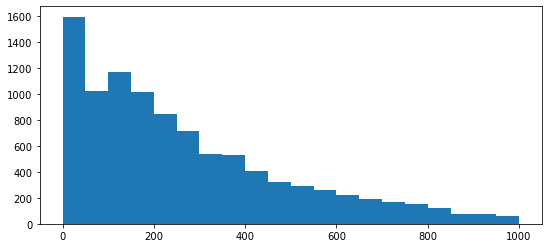

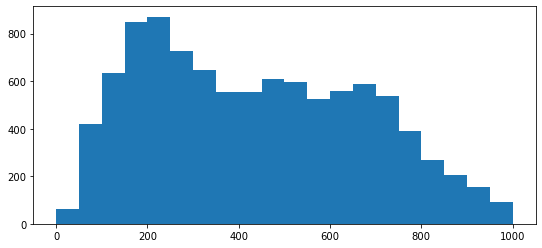

In [15]:
# Histograms to understand the distribution of word_count in fake and real news

fake = df[df['label']==1]
real = df[df['label']==0]
for i in [fake,real]:
    plt.figure(figsize=(9,4))
    plt.hist(i['word_count'],bins=20,range = (0,1000))
    plt.show()

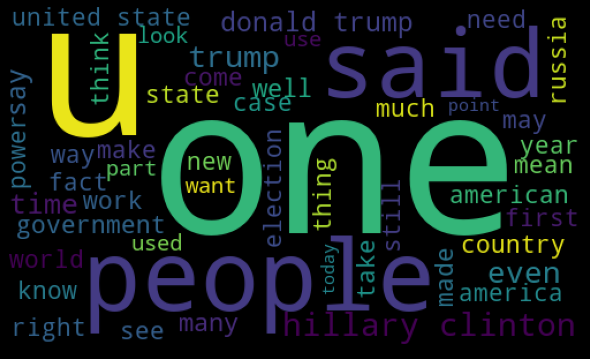

In [16]:
# Getting sense of loud words in fake news

from wordcloud import WordCloud
fn = df['text'][df['label']==1]
fn_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(fn))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(fn_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

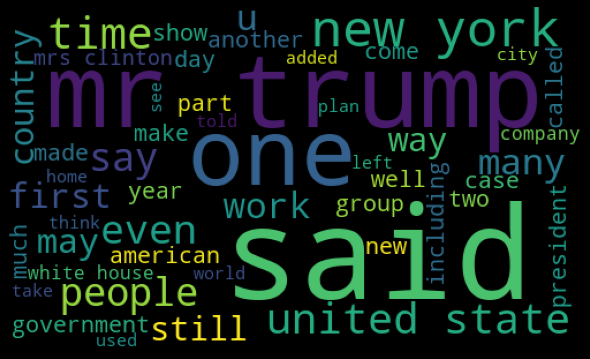

In [17]:
# Loud words in real news

rn = df['text'][df['label']==0]
rn_cloud = WordCloud(width=500,height=300,background_color='black',max_words=50).generate(' '.join(rn))
plt.figure(figsize=(8,5),facecolor='k')
plt.imshow(rn_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
# splitting the dataframe

train = df.sample(frac = 0.8)
test = df.drop(train.index)
print(train.head())
print(test.head())

       label                                               text  \
id                                                                
2119       1  noreplybloggercom alexander lightfukushima ext...   
17851      0  ben kewhawaii lawmakers ask state prepare nort...   
10236      1  activist postcolorado cannabis industry contri...   
14685      0  adelle nazarianbernie sanders extraordinary tr...   
1234       0  warner todd hustonnaacp vows oppose trumps vot...   

                                                tok_text  word_count  
id                                                                    
2119   [noreplybloggercom, alexander, lightfukushima,...         976  
17851  [ben, kewhawaii, lawmakers, ask, state, prepar...         250  
10236  [activist, postcolorado, cannabis, industry, c...          23  
14685  [adelle, nazarianbernie, sanders, extraordinar...         180  
1234   [warner, todd, hustonnaacp, vows, oppose, trum...         351  
       label                     

In [21]:
# Vectorization with Tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(preprocessor=' '.join, stop_words='english',max_features=5000)
tfidf.fit(train['tok_text'])

TfidfVectorizer(max_features=5000,
                preprocessor=<built-in method join of str object at 0x00000208323592B0>,
                stop_words='english')

In [22]:
# declaring input and target

x = tfidf.transform(train['tok_text']) 
y = train['label']

In [23]:
# Importing the necessary libraries for model building and evaluation

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0,stratify=y)

In [25]:
# Running multiple models and evaluating the performance

model = [MultinomialNB(),DecisionTreeClassifier(),SVC(),LogisticRegression()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("Accuracy score of", m,"is",accuracy_score(y_test,pred))
    print("Confusion matrix: \n",confusion_matrix(y_test,pred))
    print("Classification report: \n",classification_report(y_test,pred))
    print("\n")

Accuracy score of MultinomialNB() is 0.8855168269230769
Confusion matrix: 
 [[1506  155]
 [ 226 1441]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1661
           1       0.90      0.86      0.88      1667

    accuracy                           0.89      3328
   macro avg       0.89      0.89      0.89      3328
weighted avg       0.89      0.89      0.89      3328



Accuracy score of DecisionTreeClassifier() is 0.9053485576923077
Confusion matrix: 
 [[1494  167]
 [ 148 1519]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1661
           1       0.90      0.91      0.91      1667

    accuracy                           0.91      3328
   macro avg       0.91      0.91      0.91      3328
weighted avg       0.91      0.91      0.91      3328



Accuracy score of SVC() is 0.9558293269230769
Confusion matrix: 
 [[1568   93

From the evaluation metrics we can see that SVC and Logistic regression are performing the best.

We will tune the hyperparameters in SVC to get a better model.

In [26]:
# hyperparameter tuning with gridsearchCV on SVC

from sklearn.model_selection import GridSearchCV
svc = SVC()
p = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],'kernel': ['rbf','linear']} 
a = GridSearchCV(svc,p,cv=3)
a.fit(x,y)
a.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [27]:
# SVM after hyperparameter tuning

svc = SVC(C=10,gamma=1,kernel='rbf',probability = True)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy score of", m,"is",accuracy_score(y_test,pred))
print("Confusion matrix: \n",confusion_matrix(y_test,pred))
print("Classification report: \n",classification_report(y_test,pred))

Accuracy score of LogisticRegression() is 0.9582331730769231
Confusion matrix: 
 [[1578   83]
 [  56 1611]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1661
           1       0.95      0.97      0.96      1667

    accuracy                           0.96      3328
   macro avg       0.96      0.96      0.96      3328
weighted avg       0.96      0.96      0.96      3328



Hyperparameter tuning enables us to come up with the best version of the algorithm. Accuracy score indicates that the model is performing well as a whole. Classification report shows that the performance in both classes is good and the model is not biased towards a particular category. 

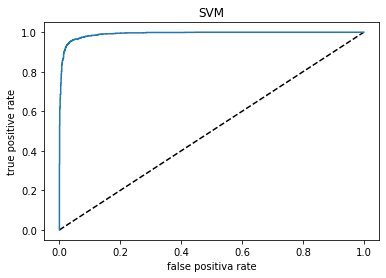

roc_auc_score:  0.958218410502126


In [28]:
# auc_roc curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_prob= svc.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'SVM')
plt.xlabel("false positiva rate")
plt.ylabel("true positive rate")
plt.title("SVM")
plt.show()
print("roc_auc_score: ",roc_auc_score(y_test,pred))

From the roc curve and the roc_auc_acore we can see that the model is not overfitted and will perform well on test data.

In [29]:
# Saving the model

import joblib
joblib.dump(svc,'fake_news.pkl')

['fake_news.pkl']

In [30]:
# Loading the model

joblib_model = joblib.load('fake_news.pkl')
joblib_model

SVC(C=10, gamma=1, probability=True)

In [31]:
# Vectorization of test data

test_data = tfidf.transform(test['tok_text'])

In [36]:
# Predicting the target for test data

submission = joblib_model.predict(test_data)
fake_news_label = pd.DataFrame(submission,index=test.index)
fake_news_label.head()

0
id      
7596   1
2150   1
386    0
13937  0
2173   0

In [38]:
# storing output as a csv file

fake_news_label.to_csv(r'C:\Users\Lavanya\OneDrive\Desktop\ipnyb files\Internship\fake news project\fake news predicted.csv',index=True)